In [64]:
import pandas as pd
import numpy as np
from itertools import compress
from sklearn.metrics import cohen_kappa_score,f1_score,accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, \
    hamming_loss


SOURCE_PATH_embeds = "/srv/workspace/research/user_based_contexts_tagging/experiments_results/single_label_deeper_weighted_normalized_long/2020-05-09_11-44-38"
gt = pd.read_csv(SOURCE_PATH_embeds + "/groundtruth_withIDS.csv")
predu = pd.read_csv(SOURCE_PATH_embeds + '/probabilities_withIDS.csv')
one_hot_u = pd.read_csv(SOURCE_PATH_embeds + '/onehot_withIDS.csv')
SOURCE_PATH_auds = "/srv/workspace/research/user_based_contexts_tagging/experiments_results/classic_updated_dataset_long/2020-05-08_13-17-43"
one_hot_a = pd.read_csv(SOURCE_PATH_auds + '/one_hoted_withIDS.csv')

In [43]:
# create a frame of NAs 
LABELS_LIST = ['car', 'gym', 'happy', 'night', 'relax',
    'running', 'sad', 'summer', 'work', 'workout']
users_audio_f1 = pd.DataFrame(gt.user_id.unique(),columns = ["user_id"])
users_embeds_f1 = pd.DataFrame(gt.user_id.unique(),columns = ["user_id"])
users_audio_recall = pd.DataFrame(gt.user_id.unique(),columns = ["user_id"])
users_embeds_recall = pd.DataFrame(gt.user_id.unique(),columns = ["user_id"])
users_audio_acc = pd.DataFrame(gt.user_id.unique(),columns = ["user_id"])
users_embeds_acc = pd.DataFrame(gt.user_id.unique(),columns = ["user_id"])
users_audio_prec = pd.DataFrame(gt.user_id.unique(),columns = ["user_id"])
users_embeds_prec = pd.DataFrame(gt.user_id.unique(),columns = ["user_id"])
for x in LABELS_LIST:
    users_audio_f1[x] = np.NAN
    users_embeds_f1[x] = np.NAN
    users_audio_recall[x] = np.NAN
    users_embeds_recall[x] = np.NAN
    users_audio_acc[x] = np.NAN
    users_embeds_acc[x] = np.NAN
    users_audio_prec[x] = np.NAN
    users_embeds_prec[x] = np.NAN
users_audio_f1 = users_audio_f1.set_index("user_id")
users_embeds_f1 = users_embeds_f1.set_index("user_id")
users_audio_recall = users_audio_recall.set_index("user_id")
users_embeds_recall = users_embeds_recall.set_index("user_id")
users_audio_acc = users_audio_acc.set_index("user_id")
users_embeds_acc = users_embeds_acc.set_index("user_id")
users_audio_prec = users_audio_prec.set_index("user_id")
users_embeds_prec = users_embeds_prec.set_index("user_id")

# compute scores for only present labels
for user in users_audio_f1.index:
    user_truth = gt[gt.user_id == user]
    user_preds_audio = one_hot_a.loc[preda.user_id == user]
    user_preds_embeds = one_hot_u.loc[predu.user_id == user]
    active_labels_idx = user_truth.sum() > 0
    active_labels_idx = active_labels_idx[2:]
    active_labels = list(compress(LABELS_LIST, active_labels_idx))
    for label in active_labels:
        users_audio_f1.loc[user][label] = f1_score(user_truth[label],user_preds_audio[label])
        users_embeds_f1.loc[user][label] = f1_score(user_truth[label],user_preds_embeds[label])
        users_audio_recall.loc[user][label] = recall_score(user_truth[label],user_preds_audio[label])
        users_embeds_recall.loc[user][label] = recall_score(user_truth[label],user_preds_embeds[label])
        users_audio_acc.loc[user][label] = accuracy_score(user_truth[label],user_preds_audio[label])
        users_embeds_acc.loc[user][label] = accuracy_score(user_truth[label],user_preds_embeds[label])
        users_audio_prec.loc[user][label] = precision_score(user_truth[label],user_preds_audio[label])
        users_embeds_prec.loc[user][label] = precision_score(user_truth[label],user_preds_embeds[label])
        
# averaging per user
user_audio_f1_mean = users_audio_f1.mean(axis=1)
user_embeds_f1_mean = users_embeds_f1.mean(axis=1)

users_audio_recall_mean = users_audio_recall.mean(axis=1)
user_embeds_recall_mean = users_embeds_recall.mean(axis=1)

user_audio_acc_mean = users_audio_acc.mean(axis=1)
user_embeds_acc_mean = users_embeds_acc.mean(axis=1)

user_audio_prec_mean = users_audio_prec.mean(axis=1)
user_embeds_prec_mean = users_embeds_prec.mean(axis=1)

"""
bestus_f1 = set()
for user in users_audio_f1.index:
    if user_embeds_f1_mean[user] >= user_audio_f1_mean[user]:
        bestus_f1.add(user)
worstus_f1 = set(gt.user_id) - bestus_f1


bestus_recall = set()
for user in users_audio_f1.index:
    if user_embeds_recall_mean[user] >= users_audio_recall_mean[user]:
        bestus_recall.add(user)
worstus_recall = set(gt.user_id) - bestus_recall

"""

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


'\nbestus_f1 = set()\nfor user in users_audio_f1.index:\n    if user_embeds_f1_mean[user] >= user_audio_f1_mean[user]:\n        bestus_f1.add(user)\nworstus_f1 = set(gt.user_id) - bestus_f1\n\n\nbestus_recall = set()\nfor user in users_audio_f1.index:\n    if user_embeds_recall_mean[user] >= users_audio_recall_mean[user]:\n        bestus_recall.add(user)\nworstus_recall = set(gt.user_id) - bestus_recall\n\n'

In [44]:
user_audio_f1_mean.mean()

0.21622411789022855

In [86]:
user_audio_f1_mean.std()

0.3889677475309737

In [45]:
user_embeds_f1_mean.mean()

0.2608611961947096

In [88]:
user_embeds_f1_mean.std()

0.41256172675641617

In [46]:
users_audio_recall_mean.mean()

0.20448969698182048

In [91]:
users_audio_recall_mean.std()

0.37834756355199967

In [47]:
user_embeds_recall_mean.mean()

0.24629068375805252

In [92]:
user_embeds_recall_mean.std()

0.40208052972332003

In [48]:
user_audio_acc_mean.mean()

0.21299044055782307

In [89]:
user_audio_acc_mean.std()

0.38052712480786743

In [49]:
user_embeds_acc_mean.mean()

0.2543340214970456

In [90]:
user_embeds_acc_mean.std()

0.4034150810047445

In [50]:
user_audio_prec_mean.mean()

0.24340416345772364

In [51]:
user_embeds_prec_mean.mean()

0.29561241635910823

In [63]:
user_truth 

,song_id,user_id,car,gym,happy,night,relax,running,sad,summer,work,workout
0,228670.0,668437.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3252,1043778.0,668437.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## use case study 

In [74]:
u_correctP = gt[(one_hot_a == gt).iloc[:,2:].sum(axis =1) == 10]

In [79]:
track_preds = u_correctP.groupby("song_id").sum()

In [81]:
track_preds[track_preds.iloc[:,1:] >=1] = 1

In [85]:
(track_preds.iloc[:,1:].sum(axis = 1) >1).sum()

0

In [106]:
audio_concate = pd.DataFrame(columns=["Accuracy","Recall","Precision","F1_score"])

In [107]:
audio_concate.Accuracy = user_audio_acc_mean
audio_concate.Recall = users_audio_recall_mean
audio_concate.Precision = user_audio_prec_mean
audio_concate.F1_score= user_audio_f1_mean

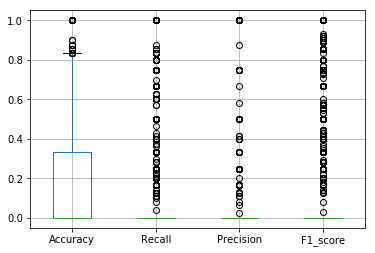

In [111]:
audio_concate.boxplot()


In [113]:
user_concate = pd.DataFrame(columns=["Accuracy","Recall","Precision","F1_score"])

In [115]:
user_concate.Accuracy = user_embeds_acc_mean
user_concate.Recall = user_embeds_recall_mean
user_concate.Precision = user_embeds_prec_mean
user_concate.F1_score= user_embeds_f1_mean

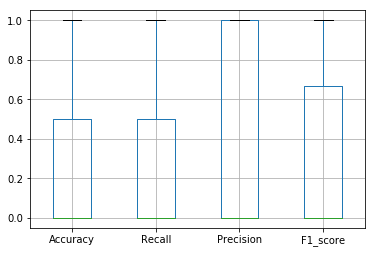

In [116]:
user_concate.boxplot()


In [128]:
(user_concate.F1_score >= audio_concate.F1_score).sum()

28495

In [129]:
(audio_concate.F1_score >= user_concate.F1_score).sum()

27050

In [142]:
exlude_users = user_concate[user_concate.F1_score == 0]
exclude_audio = audio_concate[audio_concate.F1_score == 0]

In [145]:
exlude_users = exlude_users.index
exclude_audio = exclude_audio.index

In [148]:
exclude_common = list(set(exlude_users).intersection(exclude_audio))

In [153]:
user_concate_exclude = user_concate[~user_concate.index.isin(exclude_common)]
audio_concate_exclude = audio_concate[~audio_concate.index.isin(exclude_common)]

In [160]:
(user_concate_exclude.F1_score >= audio_concate_exclude.F1_score).sum()

9441

In [158]:
(audio_concate_exclude.F1_score > user_concate_exclude.F1_score).sum()

4832

In [161]:
9441 + 4832

14273